# Harnessing Machine Learning for interpersonal physical alignment

### organize the data

In [1]:
import pandas as ps
from pandas import Series, DataFrame
import warnings
warnings.filterwarnings("ignore")

df1 = ps.read_csv('Sachar636771045591258071Spontan.csv')
df2 = ps.read_csv('Sachar636771046527112972Sync.csv')
df3 = ps.read_csv('Sachar636771047408504303Alone.csv')
df1["name"]=Series(["shachar"]);
df1["name"].fillna("shachar",inplace=True)
df1=df1.ix[700:]
df2["name"]=Series(["shachar"]);
df2["name"].fillna("shachar",inplace=True)
df2=df2.ix[700:]
df3["name"]=Series(["shachar"]);
df3["name"].fillna("shachar",inplace=True)
df3=df3.ix[700:]

df4 = ps.read_csv('Evyatar636771052727603804Spontan.csv')
df5 = ps.read_csv('Evyatar636771053639929594Sync.csv')
df6 = ps.read_csv('Evyatar636771054555711409Alone.csv')
df4["name"]=Series(["Evyatar"]);
df4["name"].fillna("Evyatar",inplace=True)
df4=df4.ix[700:]
df5["name"]=Series(["Evyatar"]);
df5["name"].fillna("Evyatar",inplace=True)
df5=df5.ix[700:]
df6["name"]=Series(["Evyatar"]);
df6["name"].fillna("Evyatar",inplace=True)
df6=df6.ix[700:]

df7 = ps.read_csv('Shelly636759787508979097Spontan.csv')
df8 = ps.read_csv('Shelly636759789526313406Sync.csv')
df9 = ps.read_csv('Shelly636759788383205274Alone.csv')
df7["name"]=Series(["shelly"]);
df7["name"].fillna("shelly",inplace=True)
df7=df7.ix[700:]
df8["name"]=Series(["shelly"]);
df8["name"].fillna("shelly",inplace=True)
df8=df8.ix[700:]
df9["name"]=Series(["shelly"]);
df9["name"].fillna("shelly",inplace=True)
df9=df9.ix[700:]

df10 = ps.read_csv('Yael636771059544754823Spontan.csv')
df11 = ps.read_csv('Yael636771060699529085Sync.csv')
df12 = ps.read_csv('Yael636771061659067649Alone.csv')
df10["name"]=Series(["yael"]);
df10["name"].fillna("yael",inplace=True)
df10=df10.ix[700:]
df11["name"]=Series(["yael"]);
df11["name"].fillna("yael",inplace=True)
df11=df11.ix[700:]
df12["name"]=Series(["yael"]);
df12["name"].fillna("yael",inplace=True)
df12=df12.ix[700:]

df13 = ps.read_csv('Nofar636759795182793299Spontan.csv')
df14 = ps.read_csv('Nofar636759797397919664Sync.csv')
df15 = ps.read_csv('Nofar636759796290435160Alone.csv')
df13["name"]=Series(["Nofar"]);
df13["name"].fillna("Nofar",inplace=True)
df13=df13.ix[700:]
df14["name"]=Series(["Nofar"]);
df14["name"].fillna("Nofar",inplace=True)
df14=df14.ix[700:]
df15["name"]=Series(["Nofar"]);
df15["name"].fillna("Nofar",inplace=True)
df15=df15.ix[700:]

df16 = ps.read_csv('Oriya636759804404113837Spontan.csv')
df17 = ps.read_csv('Oriya636759806131350399Sync.csv')
df18 = ps.read_csv('Oriya636759805268396661Alone.csv')
df16["name"]=Series(["Oriya"]);
df16["name"].fillna("Oriya",inplace=True)
df5=df5.ix[700:]
df17["name"]=Series(["Oriya"]);
df17["name"].fillna("Oriya",inplace=True)
df5=df5.ix[700:]
df18["name"]=Series(["Oriya"]);
df18["name"].fillna("Oriya",inplace=True)
df5=df5.ix[700:]

df19 = ps.read_csv('OryaB636771083605535985Spontan.csv')
df20 = ps.read_csv('OryaB636771084494502229Sync.csv')
df21 = ps.read_csv('OryaB636771082736601528Alone.csv')
df19["name"]=Series(["Orya"]);
df19["name"].fillna("Orya",inplace=True)
df19=df19.ix[700:]
df20["name"]=Series(["Orya"]);
df20["name"].fillna("Orya",inplace=True)
df20=df20.ix[700:]
df21["name"]=Series(["Orya"]);
df21["name"].fillna("Orya",inplace=True)
df21=df21.ix[700:]

df22 = ps.read_csv('Revital636770957038873193Spontan.csv')
df23 = ps.read_csv('Revital636770957894370062Sync.csv')
df24 = ps.read_csv('Revital636770955999435879Alone.csv')
df22["name"]=Series(["Revital"]);
df22["name"].fillna("Revital",inplace=True)
df22=df22.ix[700:]
df23["name"]=Series(["Revital"]);
df23["name"].fillna("Revital",inplace=True)
df23=df23.ix[700:]
df24["name"]=Series(["Revital"]);
df24["name"].fillna("Revital",inplace=True)
df24=df24.ix[700:]

df25 = ps.read_csv('Yoel636760921663075813Spontan.csv')
df26 = ps.read_csv('Yoel636760923490742912Sync.csv')
df27 = ps.read_csv('Yoel636760922573364655Alone.csv')
df25["name"]=Series(["Orya"]);
df25["name"].fillna("Orya",inplace=True)
df25=df25.ix[700:]
df26["name"]=Series(["Orya"]);
df26["name"].fillna("Orya",inplace=True)
df26=df26.ix[700:]
df27["name"]=Series(["Orya"]);
df27["name"].fillna("Orya",inplace=True)
df27=df27.ix[700:]

#Spontan
frameSpontan = [df1, df4, df7, df10, df13, df16, df19,df22, df25]
ptrain = ps.concat(frameSpontan)
ptrain["Experiment"]=Series(["3"]);
ptrain["Experiment"].fillna("3",inplace=True)

#Sync
frameSync = [df2, df6, df9, df11, df14, df17, df20, df23, df26]
strain = ps.concat(frameSync)
strain["Experiment"]=Series(["2"]);
strain["Experiment"].fillna("2",inplace=True)

#Alone
handright = ps.read_csv('HandRight.csv')
frameAlone = [df3, df5, df8, df12, df15, df18, df21, df24, df27,handright]
atrain = ps.concat(frameAlone)
atrain["Experiment"]=Series(["1"]);
atrain["Experiment"].fillna("1",inplace=True)

frames = [ptrain, strain, atrain]
final = ps.concat(frames)
final[" Hand Type"]=Series([1 if i=="right" else 2 for i in final[" Hand Type"]])
final=final.set_index(" Frame ID")
dfright=final[final[" Hand Type"]==1]
dfleft=final[final[" Hand Type"]==2]
train=ps.merge(dfleft, dfright, left_index=True, right_index=True)
train=train.drop(["name_y","Experiment_y"],axis=1)

In [2]:
#organize the data of the test
df28 = ps.read_csv('Yoel636760921663075813Spontan.csv')
df29 = ps.read_csv('Yoel636760923490742912Sync.csv')
df30 = ps.read_csv('Yoel636760922573364655Alone.csv')
df28["name"]=Series(["Orya"]);
df28["name"].fillna("Orya",inplace=True)
df29["name"]=Series(["Orya"]);
df29["name"].fillna("Orya",inplace=True)
df30["name"]=Series(["Orya"]);
df30["name"].fillna("Orya",inplace=True)

df31 = ps.read_csv('Yoel636760921663075813Spontan.csv')
df32 = ps.read_csv('Yoel636760923490742912Sync.csv')
df33 = ps.read_csv('Yoel636760922573364655Alone.csv')
df31["name"]=Series(["Orya"]);
df31["name"].fillna("Orya",inplace=True)
df32["name"]=Series(["Orya"]);
df32["name"].fillna("Orya",inplace=True)
df33["name"]=Series(["Orya"]);
df33["name"].fillna("Orya",inplace=True)

df34 = ps.read_csv('Yoel636760921663075813Spontan.csv')
df35 = ps.read_csv('Yoel636760923490742912Sync.csv')
df36 = ps.read_csv('Yoel636760922573364655Alone.csv')
df34["name"]=Series(["Orya"]);
df34["name"].fillna("Orya",inplace=True)
df35["name"]=Series(["Orya"]);
df35["name"].fillna("Orya",inplace=True)
df36["name"]=Series(["Orya"]);
df36["name"].fillna("Orya",inplace=True)

#Spontan
frames = [df28, df31, df34]
ptest = ps.concat(frames)
ptest["Experiment"]=Series(["3"]);
ptest["Experiment"].fillna("3",inplace=True)

#Sync
frames = [df29, df32, df35]
stest = ps.concat(frames)
stest["Experiment"]=Series(["2"]);
stest["Experiment"].fillna("2",inplace=True)

#Alone
handright = df34 = ps.read_csv('HandRight.csv')
frames = [df30, df33, df36, handright]
atest = ps.concat(frames)
atest["Experiment"]=Series(["1"]);
atest["Experiment"].fillna("1",inplace=True)

frames = [ptest, stest, atest]
final = ps.concat(frames)
final[" Hand Type"]=Series([1 if i=="right" else 2 for i in final[" Hand Type"]])
final=final.set_index(" Frame ID")
dfright=final[final[" Hand Type"]==1]
dfleft=final[final[" Hand Type"]==2]
test=ps.merge(dfleft, dfright, left_index=True, right_index=True,sort=True)
test=test.drop(["name_y","Experiment_y"],axis=1)

## graph

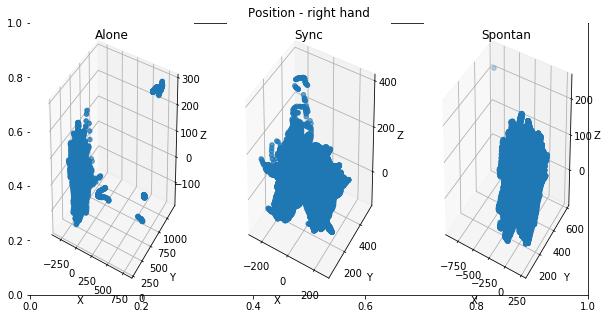

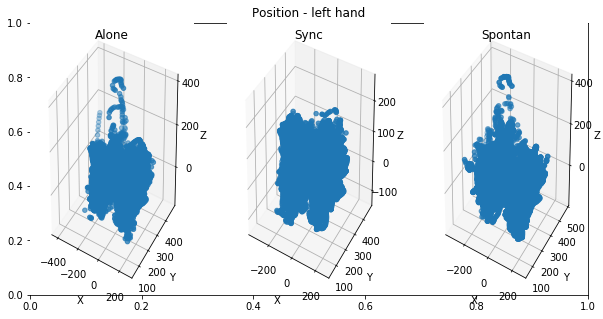

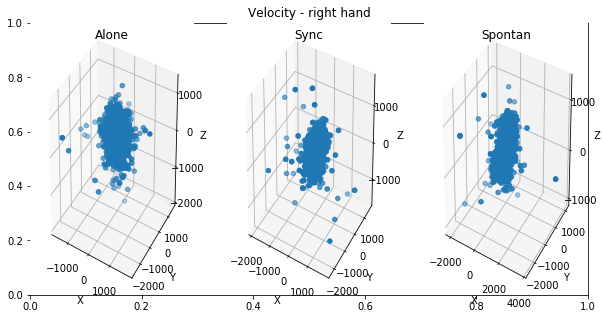

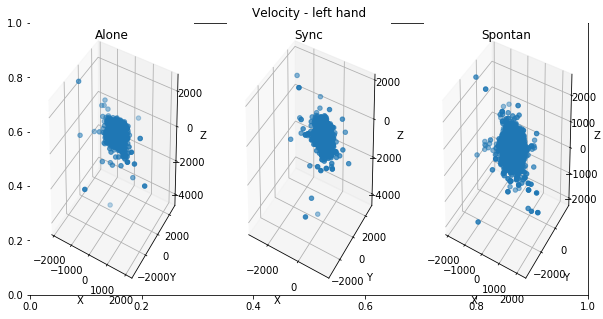

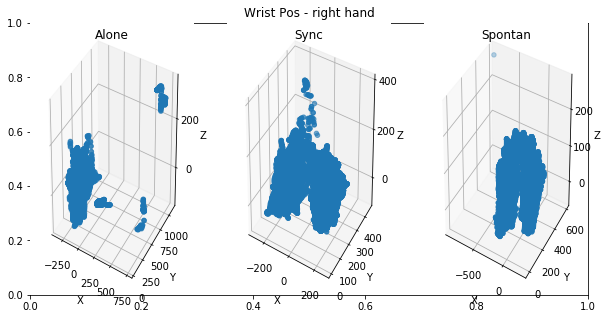

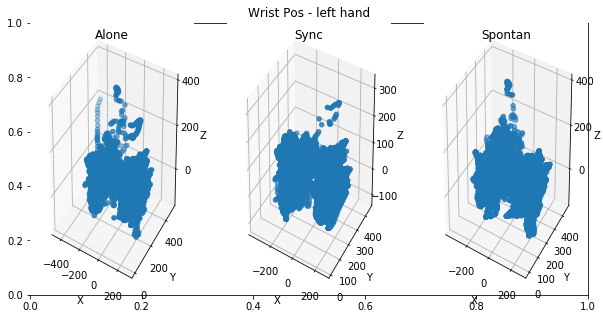

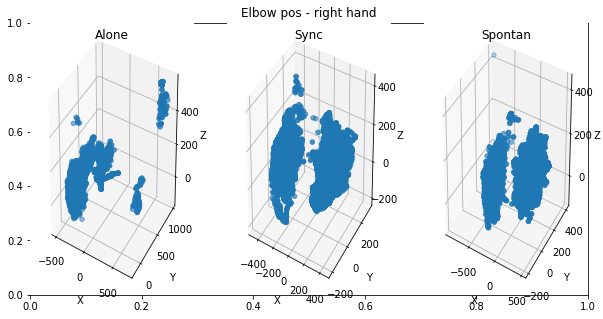

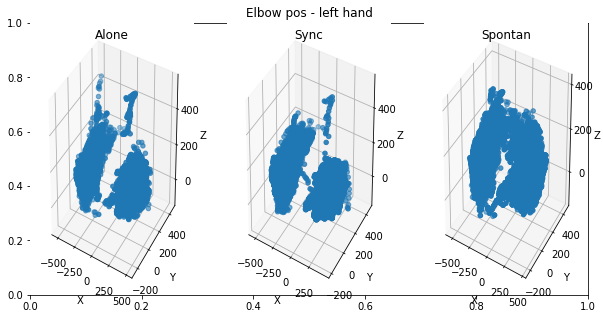

In [7]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

for pose in ["Position", "Velocity", "Wrist Pos"]:
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - right hand")
    for i in range(1,4):
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_x"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_x"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_x"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
        
    fig = plt.figure(figsize=(10,5))
    plt.title(pose+" - left hand")   
    for i in range(1,4):   
        ax = fig.add_subplot(1,3,i, projection='3d')
        x = train[train['Experiment_x']==str(i)][" "+pose+" X_y"]
        y = train[train['Experiment_x']==str(i)][" "+pose+" Y_y"]
        z = train[train['Experiment_x']==str(i)][" "+pose+" Z_y"]
        ax.scatter(x, y, z,)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - right hand")
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_x"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_x"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_x"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
        
fig = plt.figure(figsize=(10,5))
plt.title("Elbow pos - left hand")   
for i in range(1,4):   
    ax = fig.add_subplot(1,3,i, projection='3d')
    x = train[train['Experiment_x']==str(i)][" Elbow pos X_y"]
    y = train[train['Experiment_x']==str(i)][" Elbow Pos Y_y"]
    z = train[train['Experiment_x']==str(i)][" Elbow Pos Z_y"]
    ax.scatter(x, y, z,)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    if(i==1):
        plt.title("Alone")
    else:
        if(i==2):
            plt.title("Sync")
        else:
            plt.title("Spontan")
    

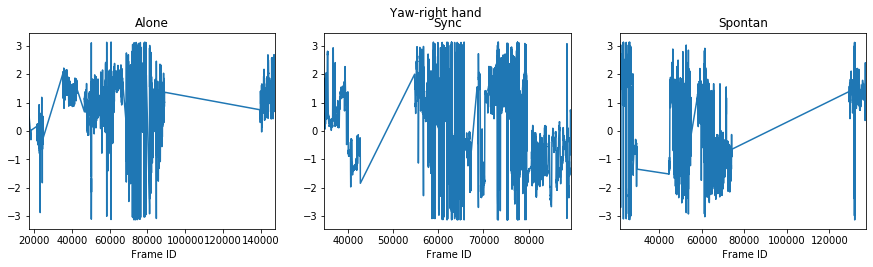

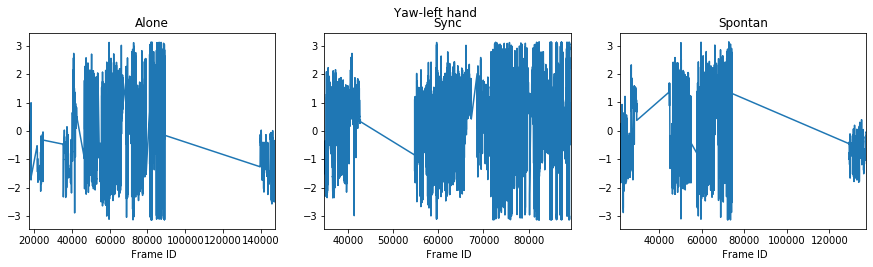

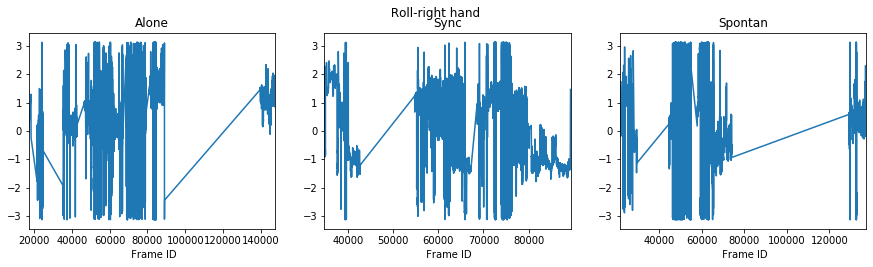

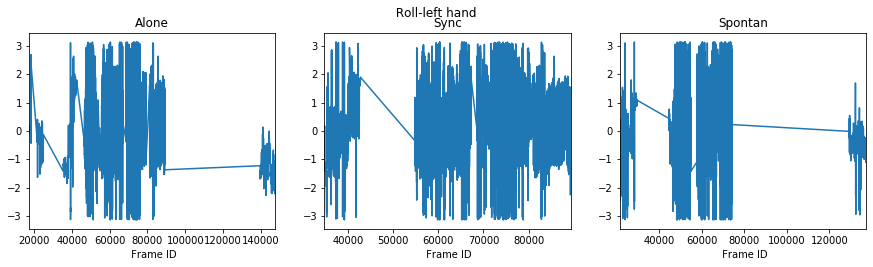

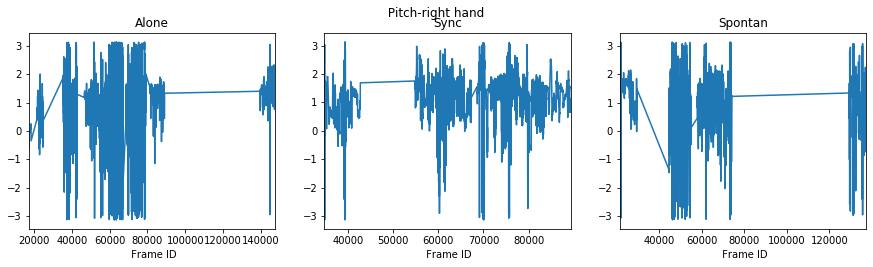

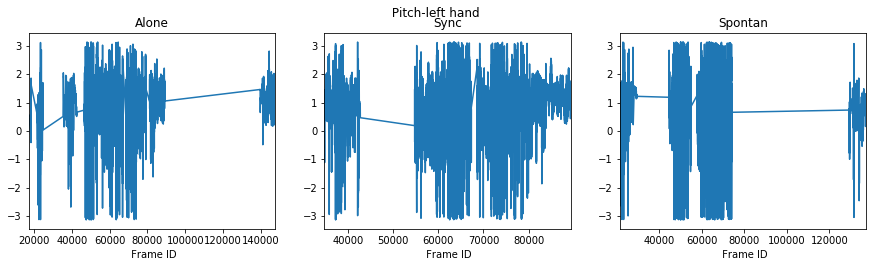

In [47]:
for move in [" Yaw"," Roll"," Pitch"]:
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-right hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_x'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")
       
    fig=plt.figure(figsize=(15,3.6))
    fig.suptitle(move+"-left hand")    
    for i in range(1,4):
        plt.subplot(1,3,i)
        train[train['Experiment_x']==str(i)][move+'_y'].plot()
        if(i==1):
            plt.title("Alone")
        else:
            if(i==2):
                plt.title("Sync")
            else:
                plt.title("Spontan")

1 = Alone
2 = Sync
3 = Spontan


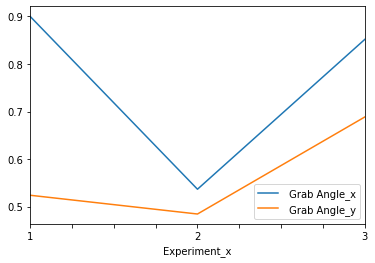

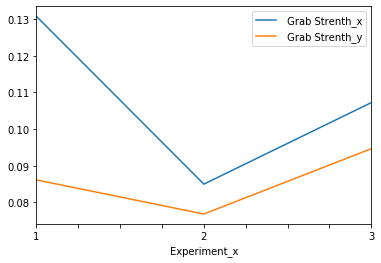

In [64]:
train.groupby(['Experiment_x'])[' Grab Angle_x',' Grab Angle_y'].mean().plot()
train.groupby(['Experiment_x'])[' Grab Strenth_x',' Grab Strenth_y'].mean().plot()
print("1 = Alone")
print("2 = Sync")
print("3 = Spontan")

# Models

In [20]:
train=train.dropna()
test=test.dropna()
X_train=train[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_train=train['Experiment_x']
X_test=test[['Time_x', ' Hand Type_x', ' Position X_x',
       ' Position Y_x', ' Position Z_x', ' Velocity X_x', ' Velocity Y_x',
       ' Velocity Z_x', ' Pitch_x', ' Roll_x', ' Yaw_x', ' Wrist Pos X_x',
       ' Wrist Pos Y_x', ' Wrist Pos Z_x', ' Elbow pos X_x', ' Elbow Pos Y_x',
       ' Elbow Pos Z_x', ' Grab Strenth_x', ' Grab Angle_x',
       ' Pinch Strength_x', 'Time_y', ' Hand Type_y',
       ' # hands_y', ' Position X_y', ' Position Y_y', ' Position Z_y',
       ' Velocity X_y', ' Velocity Y_y', ' Velocity Z_y', ' Pitch_y',
       ' Roll_y', ' Yaw_y', ' Wrist Pos X_y', ' Wrist Pos Y_y',
       ' Wrist Pos Z_y', ' Elbow pos X_y', ' Elbow Pos Y_y', ' Elbow Pos Z_y',
       ' Grab Strenth_y', ' Grab Angle_y', ' Pinch Strength_y']]
y_test=test['Experiment_x']
print("Training FeatureSet:", X_train.shape)
print("Training Labels:", y_train.shape)
print("Testing FeatureSet:", X_test.shape)
print("Testing Labels:", y_test.shape)

Training FeatureSet: (156373, 41)
Training Labels: (156373,)
Testing FeatureSet: (38799, 41)
Testing Labels: (38799,)


## naive_bayes

In [21]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB(var_smoothing=1.9)
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.8313616330317791
train score: 0.5287677540240323


In [22]:
GaussianNB(var_smoothing=1.9)

GaussianNB(priors=None, var_smoothing=1.9)

In [23]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.49292507538854097
train score: 0.46094274587045075


In [24]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.49292507538854097
train score: 0.46094274587045075


In [25]:
from sklearn.metrics import f1_score
y_pred_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.8302620292444999

## Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(tol=2.3) 
logreg.fit(X_train, y_train)
print("test score:",logreg.score(X_test,y_test))
print("train score:",logreg.score(X_train,y_train))

test score: 0.8469032707028532
train score: 0.6314773010685988


In [27]:
LogisticRegression()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the PCA
test score: 0.36372071445140336
train score: 0.337091441617159


In [29]:
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",logreg.score(X_t_test,y_test))
print("train score:",logreg.score(X_t_train,y_train))

Score from the ICA
test score: 0.48039897935513803
train score: 0.39515133686761783


In [30]:
y_press_class=logreg.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.8302620292444999

## ADABOOST

In [31]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=1,base_estimator=LogisticRegression(tol=2.3))
clf=clf.fit(X_train,y_train)
print("test score:",clf.score(X_test,y_test))
print("train score:",clf.score(X_train,y_train))

test score: 0.8471352354442124
train score: 0.6314645111368331


In [32]:
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [33]:
pca = PCA()
pca.fit(X_train)
X_t_train = pca.transform(X_train)
X_t_test = pca.transform(X_test)
print("Score from the PCA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the PCA
test score: 0.36372071445140336
train score: 0.337091441617159


In [34]:
from sklearn.decomposition import FastICA
ica = FastICA()
ica.fit(X_train)
X_t_train = ica.transform(X_train)
X_t_test = ica.transform(X_test)
print("Score from the ICA")
print("test score:",clf.score(X_t_test,y_test))
print("train score:",clf.score(X_t_train,y_train))

Score from the ICA
test score: 0.4138250985850151
train score: 0.3517998631477301


In [35]:
y_press_class=clf.predict(X_test)
f1_score(y_test, y_pred_class,average='weighted')

0.8302620292444999